In [151]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [152]:
df=pd.read_csv('Recursos/DEvideos_cc50_202101.csv')
print(df.head())
print(df.info())

      video_id trending_date  \
0  LgVi6y5QIjM      17.14.11   
1  Bayt7uQith4      17.14.11   
2  1ZAPwfrtAFY      17.14.11   
3  AHtypnRk7JE      17.14.11   
4  ZJ9We4bjcg0      17.14.11   

                                               title            channel_title  \
0  Sing zu Ende! | Gesangseinlagen vom Feinsten |...                inscope21   
1  Kinder ferngesteuert im Kiosk! Erwachsene abzo...  LUKE! Die Woche und ich   
2  The Trump Presidency: Last Week Tonight with J...          LastWeekTonight   
3                                Das Fermi-Paradoxon        100SekundenPhysik   
4           18 SONGS mit Kelly MissesVlog (Sing-off)                     rezo   

   category_id              publish_time  \
0           24  2017-11-13T17:08:49.000Z   
1           23  2017-11-12T22:30:01.000Z   
2           24  2017-11-13T07:30:00.000Z   
3           27  2017-11-12T15:00:01.000Z   
4           24  2017-11-12T13:10:36.000Z   

                                                tags   

In [153]:

#Verificamos los datos faltantes por columna:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [154]:

#Reemplazar valores faltantes que se encuentran sin descripción con el texto "No descripction"
df=df.fillna(value='Sin descripcion.')
# valores nulos despues del fill
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64

In [155]:
#Comentarios desabilitados-DATOS SIN IMPORTANCIA
(df.comments_disabled==True).sum()


1044

In [156]:
#Rating deshabilitado-DATOS SIN IMPORTANCIA
(df.ratings_disabled==True).sum()

672

In [157]:
#Rating deshabilitado-DATOS SIN IMPORTANCIA
(df.video_error_or_removed==True).sum()

14

<Axes: >

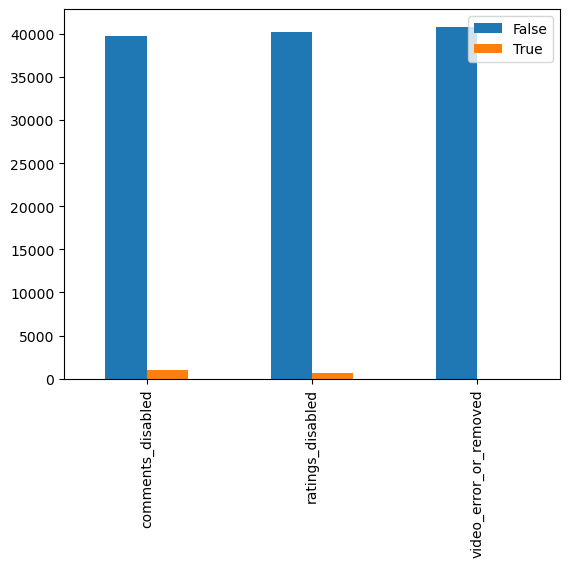

In [158]:
#Valores booleanos que nos ayudaran a saber que datos son innecesarios
test=df.select_dtypes(include='bool')
counts = test.apply(pd.Series.value_counts).transpose()
counts.plot(kind='bar')

In [159]:
#Eliminamos comments_disabled,video_error,thumbail_link, tags y ratings_disabled
df=df.drop(["comments_disabled","video_error_or_removed", "thumbnail_link","tags" ,"ratings_disabled"],axis=1)

<Axes: >

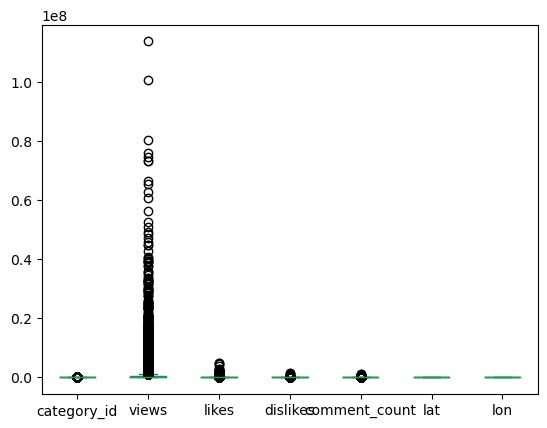

In [160]:
#Identificamos los outliers
df.plot.box()

<Axes: >

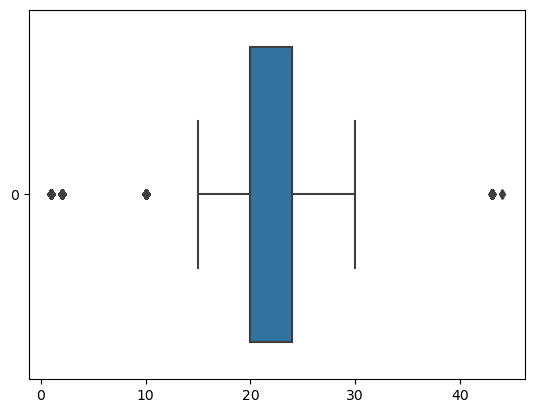

In [161]:
sns.boxplot(df["category_id"],orient='h')

<Axes: >

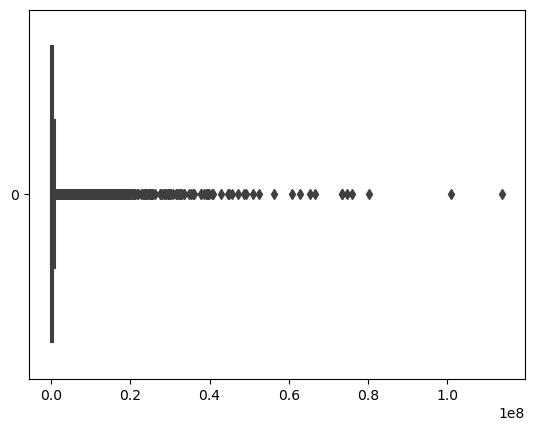

In [162]:
sns.boxplot(df["views"],orient='h')

<Axes: >

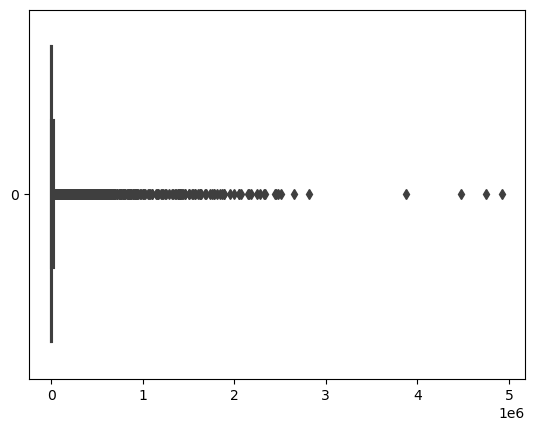

In [163]:
sns.boxplot(df["likes"],orient='h')

<Axes: >

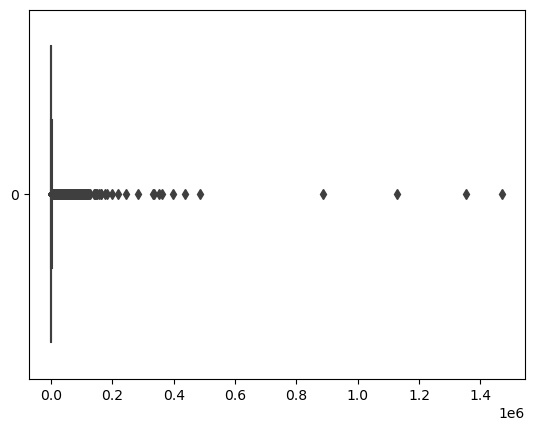

In [164]:
sns.boxplot(df["dislikes"],orient='h')

<Axes: >

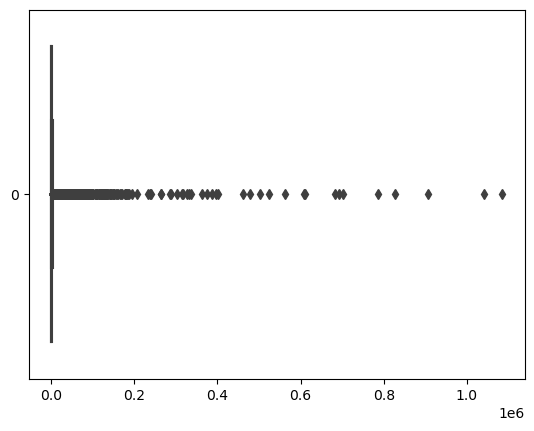

In [165]:

sns.boxplot(df["comment_count"],orient='h')

In [166]:
#Leemos el archivo JSON
with open('Recursos/DE_category_id.json') as d:
    jdata = json.load(d)

In [167]:
# Inicializa un diccionario para almacenar datos
data = {'category_id': [], 'title_category': []}

# Itera a través de los elementos y extrae la información
for item in jdata.get('items', []):
    data['category_id'].append(item.get('id', 'N/A'))
    data['title_category'].append(item.get('snippet', {}).get('title', 'N/A'))

# Crea el DataFrame
dfson = pd.DataFrame(data)

In [168]:
# Mostramos el dataframe
print(dfson)

   category_id        title_category
0            1      Film & Animation
1            2      Autos & Vehicles
2           10                 Music
3           15        Pets & Animals
4           17                Sports
5           18          Short Movies
6           19       Travel & Events
7           20                Gaming
8           21         Videoblogging
9           22        People & Blogs
10          23                Comedy
11          24         Entertainment
12          25       News & Politics
13          26         Howto & Style
14          27             Education
15          28  Science & Technology
16          30                Movies
17          31       Anime/Animation
18          32      Action/Adventure
19          33              Classics
20          34                Comedy
21          35           Documentary
22          36                 Drama
23          37                Family
24          38               Foreign
25          39                Horror
2

In [169]:
#nuevos datos json
df['category_id'] = df['category_id'].astype(type(dfson['category_id'].iloc[0]))
df = pd.merge(df, dfson, on='category_id', how='left')
# Min max scaling para "comment_count"
df["comment_count_scaled"] = (df["comment_count"] - df["comment_count"].min()) / (df["comment_count"].max() - df["comment_count"].min())
# Creación de la columna 'popularity' basada en intervalos de vistas
df['popularity'] = pd.cut(df['views'], bins=[0, 10000, 100000, 1000000, 10000000, float('inf')], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# Creación de la columna 'public_acceptance' basada en likes y dislikes
df['public_acceptance'] = (df["likes"])/(df["likes"]+df["dislikes"])
df

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,description,state,lat,lon,geometry,title_category,comment_count_scaled,popularity,public_acceptance
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,252786,35885,230,1539,Heute gibt es mal wieder ein neues Format... w...,Schleswig Holstein,54.783748,9.433315,POINT (9.433315388 54.78374778),Entertainment,0.001419,Medium,0.993631
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,797196,53576,302,1278,Kinder ferngesteuert! Kinder lassen sich sooo ...,Nordrhein Westfalen,52.029988,8.530011,POINT (8.530011351000001 52.02998822),Comedy,0.001178,Medium,0.994395
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97190,6146,12703,"One year after the presidential election, John...",Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),Entertainment,0.011714,High,0.940524
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,380247,31821,458,1955,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Bayern,50.266607,10.966607,POINT (10.96660681 50.26660748),Education,0.001803,Medium,0.985811
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,822213,100684,2467,10244,18 Song Mashup über den (veränderten) Beat von...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),Entertainment,0.009446,Medium,0.976084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40835,fn5WNxy-Wcw,18.14.06,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,2018-06-12T01:54:02.000Z,1394530,46778,501,9878,Find out more about Kingdom Hearts 3: https://...,Hessen,51.300007,9.500030,POINT (9.500029661999999 51.30000694),Gaming,0.009109,High,0.989403
40836,zAFv43lxqHE,18.14.06,YMS: The Visit,YourMovieSucksDOTorg,24,2018-06-13T21:58:43.000Z,139733,11155,119,1968,Patreon: http://www.patreon.com/YMSTwitch: htt...,Berlin,52.521819,13.401549,POINT (13.40154862 52.52181866),Entertainment,0.001815,Medium,0.989445
40837,zSXG5I6Y2fA,18.14.06,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,2018-06-12T10:01:28.000Z,26054,364,11,8,Günter versucht sich als Ersthelfer bei einem ...,Saarland,49.250390,6.970003,POINT (6.970003213 49.25039044),Entertainment,0.000007,Low,0.970667
40838,5d115sePmaU,18.14.06,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,2018-06-11T21:16:55.000Z,1139198,14900,1421,1587,"Vom verstoßenen Söldner zum legendären Helden,...",Brandenburg,51.770418,14.329967,POINT (14.32996741 51.7704175),Gaming,0.001463,High,0.912934


In [170]:
#Exportamos el dataset actualizado

df.to_csv("DE_videos.csv")